In [24]:
# import statements
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [88]:
# data import
dfWhiteWine = pd.read_csv("winequality-white.csv", sep = ';')
dfRedWine = pd.read_csv("winequality-red.csv", sep = ';')



In [140]:
dfRedWine

numEach = {}
for i in range(11):
    numEach[i] = 0
    
for index, row in dfRedWine.iterrows():
    quality = row['quality']
    numEach[quality] += 1
    if numEach[quality] > 75:
        dfRedWine = dfRedWine.drop(index)

for i in range(11):
    numEach[i] = 0
for index, row in dfRedWine.iterrows():
    quality = row['quality']
    numEach[quality] += 1

numEach

{0: 0, 1: 0, 2: 0, 3: 10, 4: 53, 5: 75, 6: 75, 7: 75, 8: 18, 9: 0, 10: 0}

In [133]:
# data cleaning
#this shows that all data values are not null
dfRedWine[dfRedWine.isnull().any(axis=1)]
dfWhiteWine[dfWhiteWine.isnull().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [134]:
# basic analysis
dfRedWineParams = dfRedWine.drop(columns=['quality'])
dfRedWineParamsArray = df.to_numpy()

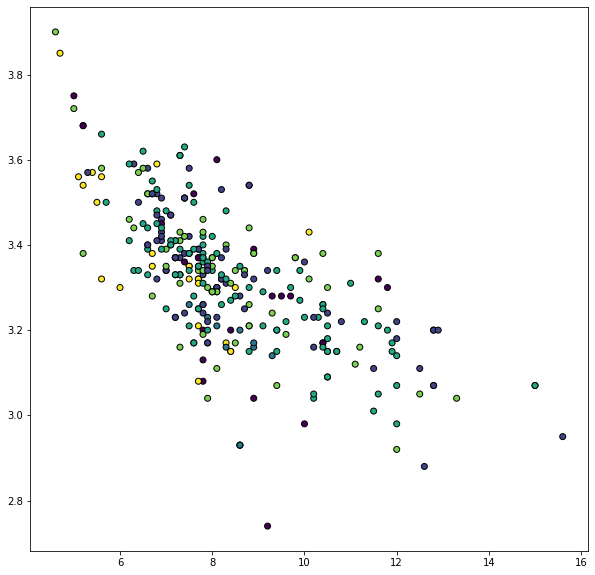

In [135]:
# k means
numClusters = 6
kmeans = KMeans(n_clusters=numClusters).fit(dfRedWineParams)
labels = kmeans.labels_
fig, ax = plt.subplots(1,1, figsize=(10,10))


ax.scatter(dfRedWineParams['fixed acidity'], dfRedWineParams['pH'], c=labels.astype(np.float), edgecolor='k')


In [136]:
# analysis of results
labels = kmeans.labels_

clusterAverage = {}
for i in range(numClusters):
    clusterAverage[i] = []
    
for index, value in enumerate(labels):
    quality = dfRedWine['quality'].iloc[index]
    clusterAverage[value].append(quality)

In [137]:
for i in range(numClusters):
    print(np.mean(clusterAverage[i]))
    


5.6923076923076925
5.871794871794871
5.090909090909091
5.6923076923076925
5.533333333333333
5.555555555555555


In [138]:
# further steps: normalize and repeat?